In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import FOLPSTracerPowerSpectrumMultipoles


theory = FOLPSTracerPowerSpectrumMultipoles(template = DirectPowerSpectrumTemplate(z = 1.45))

In [3]:
theory.varied_params

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'])

In [4]:
path_pk = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_FOLPS/Fits_DESI_Y1_DELETE/DESI_bins/pk_HN/FOLPS_QSO_theory_z1.45_kmax0.32_ell024.txt'

pk_file = np.loadtxt(path_pk)
print(pk_file.shape)

path_cov = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_FOLPS/Fits_DESI_Y1_DELETE/DESI_bins/covariances/cov_gaussian_prerec_QSO_GCcomb_0.8_2.1_ell024.txt'

file2 = path_cov
covariance_data = np.loadtxt(file2)
print(covariance_data.shape)

(64, 4)
(192, 192)


In [5]:
def new_data(min_k, max_k, pk_data, covariance_data): #Función para establecer las dimensiones de los datos en función de los límites de k
    for i in range(len(pk_data[:,0:1])):
        if pk_data[:,0:1][i]==min_k:
            n = i
        if pk_data[:,0:1][i]==max_k:
            m = i
    p_subfile1 = pk_data[:,1:2][n:m+1]
    p_subfile2 = pk_data[:,2:3][n:m+1]
    p_subfile3 = pk_data[:,3:4][n:m+1]
    p_1 = np.vstack((p_subfile1,p_subfile2))
    p = np.vstack((p_1,p_subfile3))
    print('Dimensiones del vector de datos de multipolos: ', p.shape) #Creamos un vector con los datos de los 3 multipolos (p0,p2,p4)
    s = int(len(covariance_data[0])/3)
    mask1 = covariance_data[n:m+1, n:m+1]
    mask2 = covariance_data[n:m+1, n+s:m+1+s]
    mask3 = covariance_data[n:m+1, n+(2*s):m+1+(2*s)]
    mask4 = covariance_data[n+s:m+1+s, n:m+1]
    mask5 = covariance_data[n+s:m+1+s, n+s:m+1+s]
    mask6 = covariance_data[n+s:m+1+s, n+(2*s):m+1+(2*s)]
    mask7 = covariance_data[n+(2*s):m+1+(2*s), n:m+1]
    mask8 = covariance_data[n+(2*s):m+1+(2*s), n+s:m+1+s]
    mask9 = covariance_data[n+(2*s):m+1+(2*s), n+(2*s):m+1+(2*s)]
    h1 = np.hstack((mask1,mask2))
    h2 = np.hstack((h1, mask3))
    h3 = np.hstack((mask4, mask5))
    h4 = np.hstack((h3, mask6))
    h5 = np.hstack((mask7,mask8))
    h6 = np.hstack((h5, mask9))
    final1 = np.vstack((h2,h4))
    final = np.vstack((final1, h6))
    new_covariance = final
    print('Las dimensiones de la matriz de covarianza son: ', new_covariance.shape) #Creamos una matriz de covarianza nueva, eliminando los datos que exceden los límites de k
    return p, new_covariance

In [8]:
p, new_covariance = new_data(pk_file[:,0:1][4], pk_file[:,0:1][39], pk_file, covariance_data)

Dimensiones del vector de datos de multipolos:  (108, 1)
Las dimensiones de la matriz de covarianza son:  (108, 108)


In [9]:
new_covariance[:36,0:3]

array([[1680620.1738416 ,  219977.41912579,   18811.36373632],
       [ 219977.41912579, 1129533.84737246,  146960.79189197],
       [  18811.36373632,  146960.79189197,  716198.25170152],
       [   4090.74526236,   13067.71353083,   96222.78773215],
       [      0.        ,    2779.95686616,    8606.87689813],
       [      0.        ,       0.        ,    1941.04498054],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.   

In [10]:
covariance_data[4:40,4:7]

array([[1680620.1738416 ,  219977.41912579,   18811.36373632],
       [ 219977.41912579, 1129533.84737246,  146960.79189197],
       [  18811.36373632,  146960.79189197,  716198.25170152],
       [   4090.74526236,   13067.71353083,   96222.78773215],
       [      0.        ,    2779.95686616,    8606.87689813],
       [      0.        ,       0.        ,    1941.04498054],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.   

In [11]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
    data = p,
    covariance = new_covariance,
    klim={0: [0.02256549, 0.19751986, 0.0048], 2: [0.02256549, 0.19751986, 0.0048], 4:[0.02256549, 0.19751986, 0.0048]},
    theory = theory)

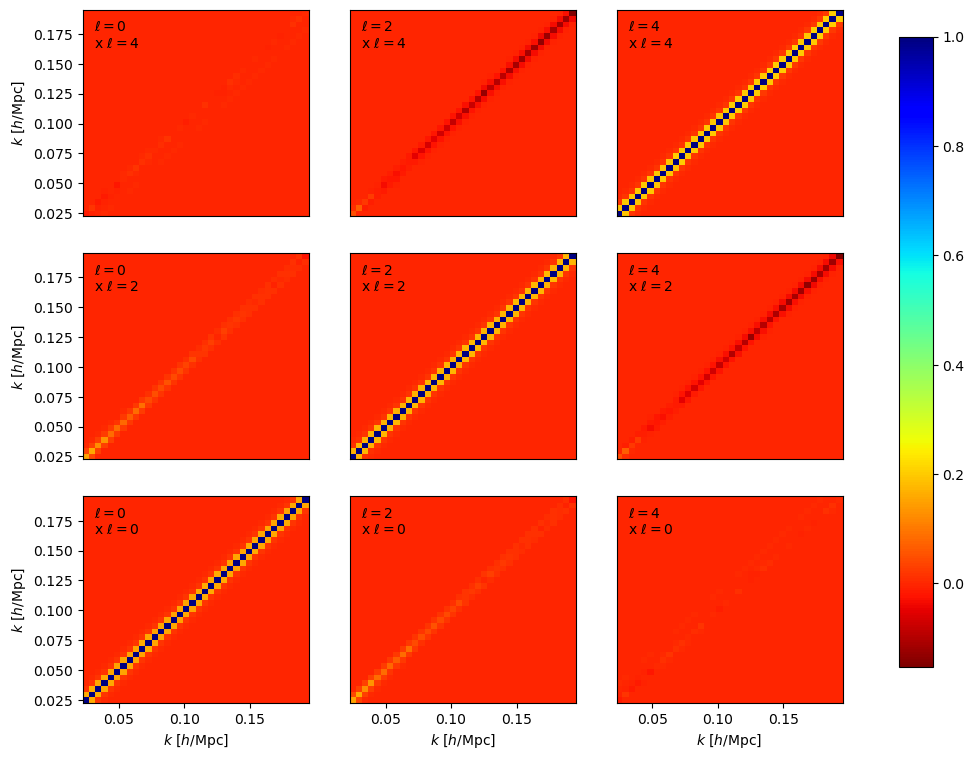

In [12]:
observable.plot_covariance_matrix();

In [13]:
from desilike.likelihoods import ObservablesGaussianLikelihood

likelihood = ObservablesGaussianLikelihood(observables = [observable], covariance = new_covariance)

In [14]:
from desilike import setup_logging
setup_logging()
likelihood()

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


Array(-5481.92861936, dtype=float64)

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed
[000031.49] [0/1] 04-15 23:08  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000031.49] [0/1] 04-15 23:08  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000033.10] [0/1] 04-15 23:08  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000041.46] [0/1] 04-15 23:09  Differentiation           INFO     Using finite-differentiation for parameter h.
[000043.11] [0/1] 04-15 23:09  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000044.73] [0/1] 04-15 23:09  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000046.38] [0/1] 04-15 23:09  Diffe

[<Figure size 600x600 with 2 Axes>]

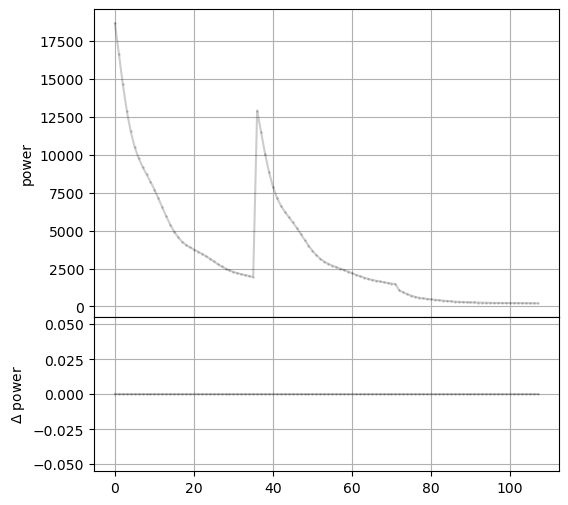

In [15]:
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine

emulator = Emulator(theory, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))
emulator.set_samples()
emulator.fit()
emulator.plot(name='power')

In [16]:
from desilike.samplers import EmceeSampler, ZeusSampler

In [44]:
observable.init.update(theory=emulator.to_calculator())

sampler = EmceeSampler(likelihood, save_fn = 'test_QSO_z1.45_full_modeling_v1_FOLPS', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

[000309.49] [0/1] 04-14 12:58  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000309.99] [0/1] 04-14 12:59  EmceeSampler              INFO     Successfully vmap input likelihood.
[000310.14] [0/1] 04-14 12:59  EmceeSampler              INFO     Successfully jit input likelihood.
[000310.36] [0/1] 04-14 12:59  TaskManager               INFO     Entering TaskManager with 1 workers.
[000313.71] [0/1] 04-14 12:59  Chain                     INFO     Saving test_QSO_z1.45_full_modeling_v1_FOLPS.
[000313.72] [0/1] 04-14 12:59  EmceeSampler              INFO     Diagnostics:
[000313.75] [0/1] 04-14 12:59  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 4.55; not < 0.15.
[000313.78] [0/1] 04-14 12:59  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.803.
[000314.00] [0/1] 04-14 12:59  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 

[Chain(shape=(6000, 30), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'b3', 'ct', 'loglikelihood', 'logprior']))]

In [45]:
chain = sampler.chains[0].remove_burnin(0.5)
print(chain.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.691  |  0.697  |  0.698  | 0.025  |  -0.025/+0.025  |  -0.019/+0.030  |
| omega_cdm | 0.1127  | 0.1138  | 0.1129  | 0.0089 | -0.0082/+0.0084 | -0.0096/+0.0065 |
|  omega_b  | 0.02230 | 0.02234 | 0.02233 | 3.8e-4 | -3.6e-4/+3.7e-4 | -3.4e-4/+3.8e-4 |
|   logA    |  3.13   |  3.05   |  3.04   |  0.15  |   -0.15/+0.15   |   -0.17/+0.11   |
|    b1     |  1.90   |  2.04   |  2.05   |  0.18  |   -0.18/+0.18   |   -0.11/+0.25   |
|    b2     |  -2.0   |  -0.7   |  -0.8   |  3.2   |    -3.3/+3.4    |    -2.8/+3.8    |
|    bs     |  11.3   |   5.0   |   4.8   |  6.6   |    -6.4/+6.7    |    -6.8/+6.3    |
|  alpha0   |   28    |   13    |   20.   |   71   |     -72/+66     |     -69/+68     |
|  alpha2   |    8   

In [17]:
%matplotlib inline
from desilike.samples import plotting

In [47]:
plotting.plot_triangle(chain,labels = 'FOLPS',filled = True, markers={'h': 0.7, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 3, 'b1':2 , 'b2': -0.7, 'bs':5,'alpha0':13,'alpha2':-9,'alpha4':-112,'sn0':0.25, 'sn2':-3.7});
plt.savefig('test_QSO_z1_45_full_modeling_v1_FOLPS')

Removed no burn in
[000743.35] [0/1] 04-14 13:06  root                      WARNING  auto bandwidth for h very small or failed (h=0.00027880379203975723,N_eff=90000.0). Using fallback (h=0.013466074054591135)
[000743.46] [0/1] 04-14 13:06  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.000289609922847157,N_eff=90000.0). Using fallback (h=0.012273472267885)
[000743.58] [0/1] 04-14 13:06  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.0002853317469980459,N_eff=90000.0). Using fallback (h=0.012902968836060168)
[000743.94] [0/1] 04-14 13:06  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0002750497573760002,N_eff=90000.0). Using fallback (h=0.013344355175499046)
[000744.02] [0/1] 04-14 13:06  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0002759994256550441,N_eff=90000.0). Using fallback (h=0.013571547521210295)
[000744.10] [0/1] 04-

In [18]:
observable.init.update(theory=emulator.to_calculator())

sampler2 = EmceeSampler(likelihood, save_fn = 'test_QSO_z1.45_full_modeling_v2_FOLPS', seed=42)
sampler2.run(check={'max_eigen_gr': 0.05})

[000136.78] [0/1] 04-15 23:10  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2'].
[000137.33] [0/1] 04-15 23:10  EmceeSampler              INFO     Successfully vmap input likelihood.
[000137.49] [0/1] 04-15 23:10  EmceeSampler              INFO     Successfully jit input likelihood.
[000137.74] [0/1] 04-15 23:10  TaskManager               INFO     Entering TaskManager with 1 workers.
[000141.74] [0/1] 04-15 23:10  Chain                     INFO     Saving test_QSO_z1.45_full_modeling_v2_FOLPS.
[000141.75] [0/1] 04-15 23:10  EmceeSampler              INFO     Diagnostics:
[000141.79] [0/1] 04-15 23:10  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 7.65; not < 0.05.
[000141.83] [0/1] 04-15 23:10  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.111.
[000142.04] [0/1] 04-15 23:10  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 

KeyboardInterrupt: 

In [19]:
#likelihood(**sampler.chains[0].choice(params=likelihood.varied_params))
#observable.plot()
#plt.show()

In [21]:
from desilike.theories import Cosmoprimo
cosmo = Cosmoprimo()
print(cosmo.all_params)

cosmo.params = {'h': {'prior': {'limits': [0.5, 0.9]}},
                     'omega_b': {'prior': {'limits': [0.022, 0.02274]}},
                     'logA' : {'prior' : {'limits': [2,4]}},
                     'omega_cdm': {'prior': {'limits': [0.05,0.2]}}            
                     }

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k'])


In [29]:
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles
template = DirectPowerSpectrumTemplate(z=1.45)
theory2 = KaiserTracerPowerSpectrumMultipoles(template = template)

In [30]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable

observable = TracerPowerSpectrumMultipolesObservable(
    data = p,
    covariance = new_covariance,
    klim={0: [0.02256549, 0.19751986, 0.0048], 2: [0.02256549, 0.19751986, 0.0048], 4:[0.02256549, 0.19751986, 0.0048]},
    theory = theory2)

In [31]:
likelihood2 = ObservablesGaussianLikelihood(observables = [observable], covariance = new_covariance)

In [32]:
setup_logging()
likelihood2()

Array(-5735.74336907, dtype=float64)

[000036.12] [0/1] 04-15 23:36  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000036.12] [0/1] 04-15 23:36  Emulator                  INFO     Found varying ['power'] and fixed ['k', 'z', 'ells', 'nd'] outputs.
[000037.49] [0/1] 04-15 23:36  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000044.86] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter h.
[000046.35] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000047.87] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000049.32] [0/1] 04-15 23:36  Differentiation           INFO     Using finite-differentiation for parameter logA.
[000049.39] [0/1] 04-15 23:36  Differentiation           INFO     Using auto-differentiation for parameter b1.
[000049.44] [0/1

[<Figure size 600x600 with 2 Axes>]

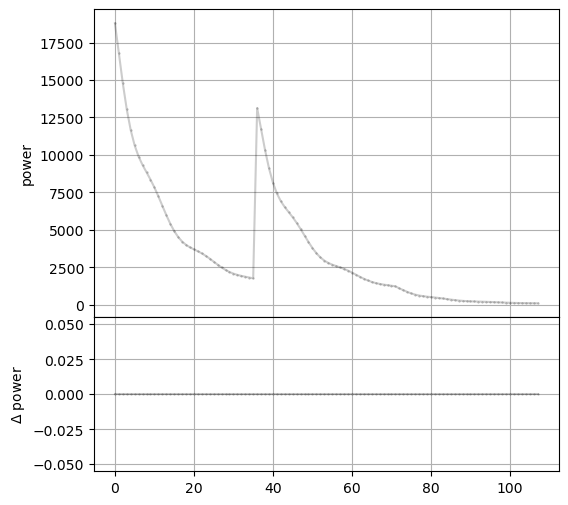

In [33]:
emulator2 = Emulator(theory2, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))  # order 2 except for sn0 (order 1 is enough)
emulator2.set_samples()
emulator2.fit()
emulator2.plot(name='power')

In [34]:
observable.init.update(theory=emulator2.to_calculator())

sampler2 = EmceeSampler(likelihood2, save_fn = 'test_QSO_z1.45_v1_fullmodeling_KAISER', seed=42)
sampler2.run(check={'max_eigen_gr': 0.15})

[000106.38] [0/1] 04-15 23:37  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000106.50] [0/1] 04-15 23:37  EmceeSampler              INFO     Successfully vmap input likelihood.
[000106.61] [0/1] 04-15 23:37  EmceeSampler              INFO     Successfully jit input likelihood.
[000106.78] [0/1] 04-15 23:37  TaskManager               INFO     Entering TaskManager with 1 workers.
[000108.78] [0/1] 04-15 23:37  Chain                     INFO     Saving test_QSO_z1.45_v1_fullmodeling_KAISER.
[000108.78] [0/1] 04-15 23:37  EmceeSampler              INFO     Diagnostics:
[000108.80] [0/1] 04-15 23:37  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 3.65; not < 0.15.
[000108.82] [0/1] 04-15 23:37  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 1.24.
[000108.96] [0/1] 04-15 23:37  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 1.19.
[000108.97] [0/1] 04-15 23:37 

[Chain(shape=(3900, 16), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'sigmapar', 'sigmaper', 'loglikelihood', 'logprior']))]

In [35]:
chain2 = sampler2.chains[0].remove_burnin(0.5)
print(chain2.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.646  |  0.646  |  0.646  | 0.019  |  -0.019/+0.019  |  -0.020/+0.017  |
| omega_cdm | 0.1077  | 0.1083  | 0.1084  | 0.0043 | -0.0043/+0.0043 | -0.0041/+0.0044 |
|  omega_b  | 0.02224 | 0.02228 | 0.02229 | 3.5e-4 | -3.5e-4/+3.5e-4 | -3.8e-4/+3.2e-4 |
|   logA    |  2.546  |  2.551  |  2.549  | 0.072  |  -0.072/+0.072  |  -0.076/+0.068  |
|    b1     |  2.817  |  2.804  |  2.805  | 0.073  |  -0.074/+0.074  |  -0.067/+0.079  |
|    sn0    |  0.136  |  0.135  |  0.135  | 0.012  |  -0.012/+0.012  |  -0.011/+0.013  |
+-----------+---------+---------+---------+--------+-----------------+-----------------+


In [36]:
%matplotlib inline

In [37]:
plotting.plot_triangle(chain2,labels = 'KAISER', markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v1_KAISER')

Removed no burn in
[000269.96] [0/1] 04-15 23:40  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0007555877613420839,N_eff=31200.0). Using fallback (h=0.01705997242122773)
[000270.06] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[000270.16] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[000270.22] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[000270.27] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[000270.34] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: h, sn0
[000270.40] [0/1] 04-15 23:40  root                      WARNING  fine_bins_2D not large enough for optimal density: omega_cdm, omega_b
[000270.45] [0/1] 04-15 

In [38]:
observable.init.update(theory=emulator2.to_calculator())

sampler3 = EmceeSampler(likelihood2, save_fn = 'test_QSO_z1.45_v2_fullmodeling_KAISER', seed=42)
sampler3.run(check={'max_eigen_gr': 0.05})

[000388.03] [0/1] 04-15 23:42  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'].
[000388.09] [0/1] 04-15 23:42  EmceeSampler              INFO     Successfully vmap input likelihood.
[000388.20] [0/1] 04-15 23:42  EmceeSampler              INFO     Successfully jit input likelihood.
[000388.36] [0/1] 04-15 23:42  TaskManager               INFO     Entering TaskManager with 1 workers.
[000390.47] [0/1] 04-15 23:42  Chain                     INFO     Saving test_QSO_z1.45_v2_fullmodeling_KAISER.
[000390.48] [0/1] 04-15 23:42  EmceeSampler              INFO     Diagnostics:
[000390.50] [0/1] 04-15 23:42  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 3.65; not < 0.05.
[000390.52] [0/1] 04-15 23:42  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 1.24.
[000390.64] [0/1] 04-15 23:42  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 1.19.
[000390.65] [0/1] 04-15 23:42 

[Chain(shape=(7800, 16), params=ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0', 'logposterior', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k', 'sigmapar', 'sigmaper', 'loglikelihood', 'logprior']))]

In [39]:
chain3 = sampler3.chains[0].remove_burnin(0.5)
print(chain3.to_stats(tablefmt='pretty'))

+-----------+---------+---------+---------+--------+-----------------+-----------------+
|           | argmax  |  mean   | median  |  std   | quantile:1sigma | interval:1sigma |
+-----------+---------+---------+---------+--------+-----------------+-----------------+
|     h     |  0.648  |  0.648  |  0.647  | 0.019  |  -0.019/+0.019  |  -0.020/+0.018  |
| omega_cdm | 0.1080  | 0.1081  | 0.1081  | 0.0044 | -0.0044/+0.0044 | -0.0046/+0.0043 |
|  omega_b  | 0.02231 | 0.02227 | 0.02227 | 3.5e-4 | -3.5e-4/+3.4e-4 | -3.4e-4/+3.5e-4 |
|   logA    |  2.550  |  2.552  |  2.553  | 0.073  |  -0.075/+0.073  |  -0.072/+0.075  |
|    b1     |  2.803  |  2.802  |  2.802  | 0.072  |  -0.071/+0.072  |  -0.071/+0.072  |
|    sn0    |  0.137  |  0.135  |  0.135  | 0.012  |  -0.012/+0.012  |  -0.012/+0.012  |
+-----------+---------+---------+---------+--------+-----------------+-----------------+


In [40]:
plotting.plot_triangle(chain3,labels = 'KAISER', markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v2_KAISER')

Removed no burn in
[000464.31] [0/1] 04-15 23:43  root                      WARNING  auto bandwidth for logA very small or failed (h=0.000772568294742381,N_eff=62400.0). Using fallback (h=0.013628115540726484)
[000464.34] [0/1] 04-15 23:43  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0007037753693428905,N_eff=62400.0). Using fallback (h=0.014319166306533376)
[000464.41] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[000464.47] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[000464.53] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[000464.59] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[000464.65] [0/1] 04-15 23:43  root                      WARNING  fine_bins_2D not large enoug

In [44]:
from desilike.samples import Chain

chain = Chain.load('test_QSO_z1.45_full_modeling_v1_FOLPS.npy').remove_burnin(0.3)
z = 1.45

[000909.61] [0/1] 04-15 23:50  Chain                     INFO     Loading test_QSO_z1.45_full_modeling_v1_FOLPS.npy.


Removed no burn in
[001197.18] [0/1] 04-15 23:55  root                      WARNING  auto bandwidth for logA very small or failed (h=0.000772568294742381,N_eff=62400.0). Using fallback (h=0.013628115540726484)
[001197.22] [0/1] 04-15 23:55  root                      WARNING  auto bandwidth for b1 very small or failed (h=0.0007037753693428905,N_eff=62400.0). Using fallback (h=0.014319166306533376)
[001197.30] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_cdm
[001197.38] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, omega_b
[001197.45] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, logA
[001197.53] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enough for optimal density: h, b1
[001197.60] [0/1] 04-15 23:55  root                      WARNING  fine_bins_2D not large enoug

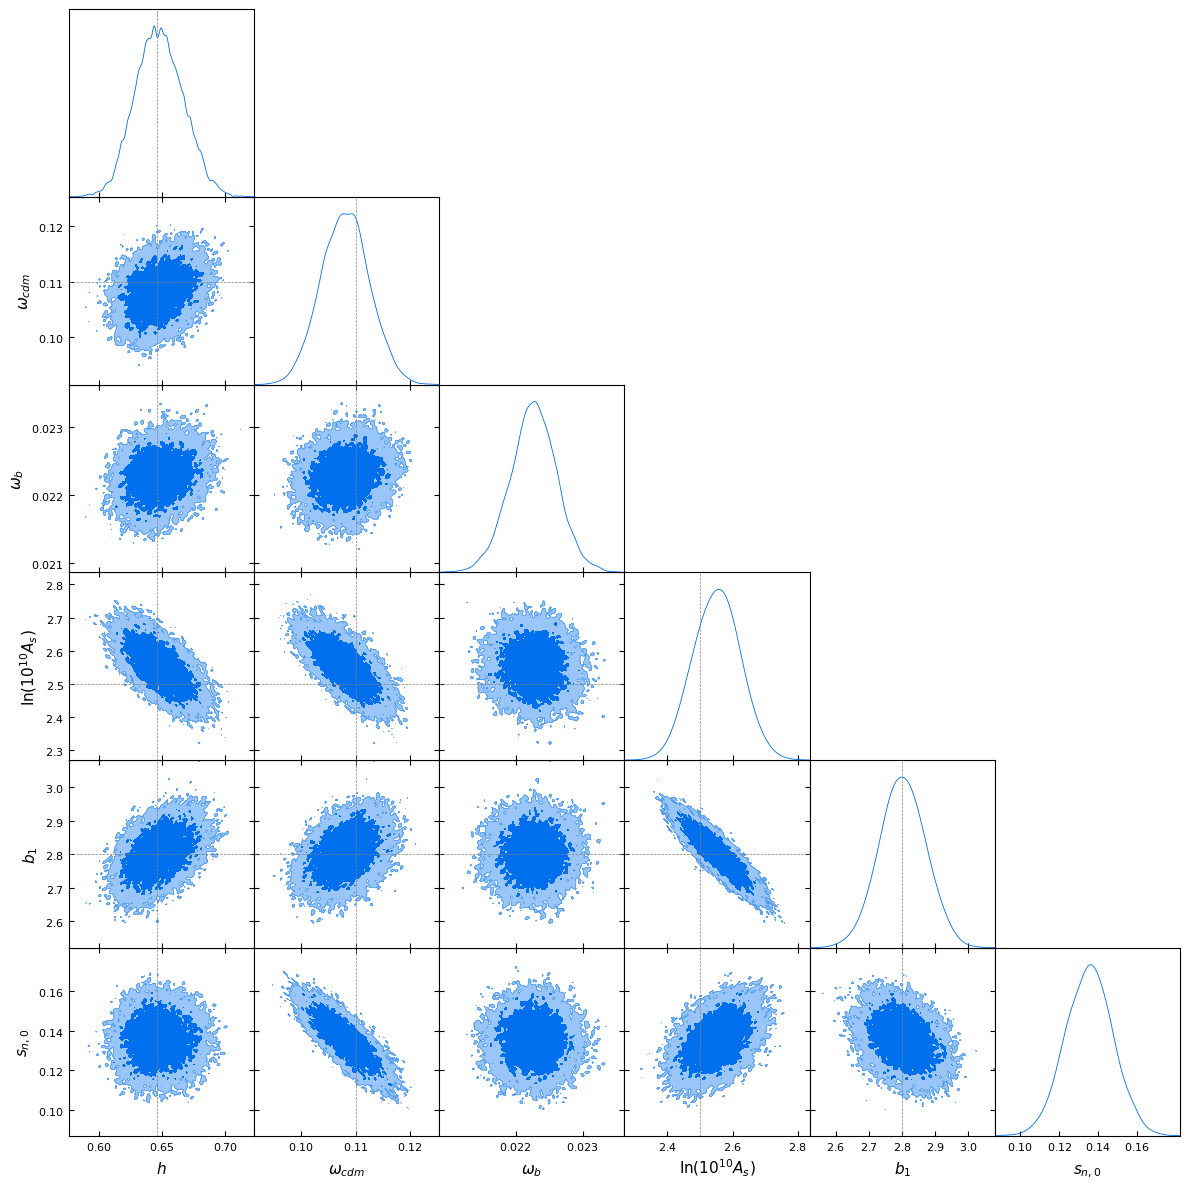

In [47]:
%matplotlib inline
plotting.plot_triangle(chain3,labels = 'KAISER',filled = True, markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('test_QSO_z1_45_full_modeling_v2_KAISER')

Removed no burn in
Removed no burn in
[001754.84] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for h very small or failed (h=0.00029235848847096067,N_eff=126000.0). Using fallback (h=0.011824009918364277)
[001754.93] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.00028119680714910504,N_eff=126000.0). Using fallback (h=0.0121646192286043)
[001755.02] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.00028116105781744174,N_eff=126000.0). Using fallback (h=0.012682428017243357)
[001755.06] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for logA very small or failed (h=0.000772568294742381,N_eff=62400.0). Using fallback (h=0.013628115540726484)
[001755.09] [0/1] 04-16 00:05  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0002832035402075361,N_eff=126000.0). Using fallback (h=0.0124361333047

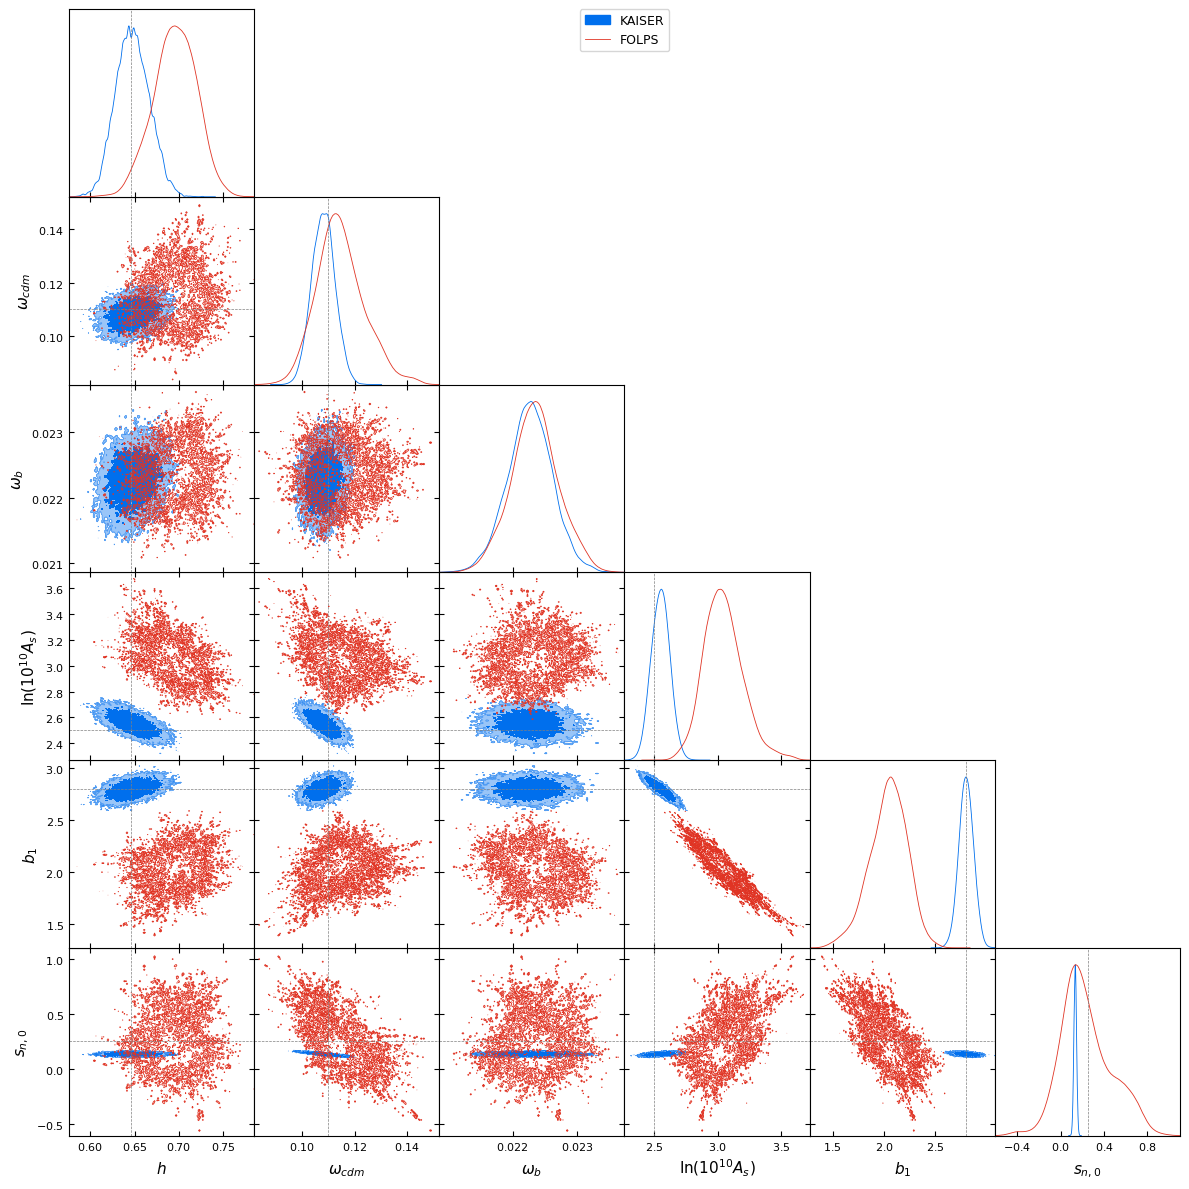

In [54]:
plotting.plot_triangle([chain3, chain],labels = ['KAISER','FOLPS'],filled = True, markers={'h': 0.646, 'omega_cdm': 0.11, 'omega_b': 0.02, 'logA': 2.5, 'b1':2.8 ,'sn0':0.25, });
plt.savefig('Comparison_FOLPS_KAISER')